In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import your Requests Library and the weather_api_key.

import requests
from config import weather_api_key

In [7]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guspini
Processing Record 2 of Set 1 | uvira
Processing Record 3 of Set 1 | anzhero-sudzhensk
Processing Record 4 of Set 1 | asau
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | palora
Processing Record 11 of Set 1 | ketchikan
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | camacha
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | darhan
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | bulawayo
Processing Record 20 of Set 1 | krasnoselkup
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Se

Processing Record 37 of Set 4 | marzuq
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | beidao
Processing Record 41 of Set 4 | dali
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | higuey
City not found. Skipping...
Processing Record 45 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 46 of Set 4 | uarini
Processing Record 47 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 48 of Set 4 | saryozek
Processing Record 49 of Set 4 | oriximina
Processing Record 50 of Set 4 | nandu
Processing Record 1 of Set 5 | nortelandia
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | nioro
Processing Record 5 of Set 5 | aktau
Processing Record 6 of Set 5 | buraydah
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of Set 5 | wa

Processing Record 27 of Set 8 | kabardinka
Processing Record 28 of Set 8 | nabire
Processing Record 29 of Set 8 | elko
Processing Record 30 of Set 8 | chokurdakh
Processing Record 31 of Set 8 | oskaloosa
Processing Record 32 of Set 8 | natuba
Processing Record 33 of Set 8 | mount isa
Processing Record 34 of Set 8 | leo
Processing Record 35 of Set 8 | hashtrud
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bagdarin
Processing Record 38 of Set 8 | rosetta
Processing Record 39 of Set 8 | lima
Processing Record 40 of Set 8 | skjervoy
Processing Record 41 of Set 8 | trois-rivieres
Processing Record 42 of Set 8 | vieste
Processing Record 43 of Set 8 | vacaria
Processing Record 44 of Set 8 | victoria
Processing Record 45 of Set 8 | sorong
Processing Record 46 of Set 8 | pangody
Processing Record 47 of Set 8 | coruripe
Processing Record 48 of Set 8 | camden
Processing Record 49 of Set 8 | fairbanks
Processing Record 50 of Set 8 | hoquiam
Processing Record 1 of Set 9

Processing Record 19 of Set 12 | inhambane
Processing Record 20 of Set 12 | cabedelo
Processing Record 21 of Set 12 | guider
Processing Record 22 of Set 12 | taungdwingyi
Processing Record 23 of Set 12 | labuan
Processing Record 24 of Set 12 | liwale
Processing Record 25 of Set 12 | penza
Processing Record 26 of Set 12 | vysokogornyy
Processing Record 27 of Set 12 | ucluelet
Processing Record 28 of Set 12 | temir
Processing Record 29 of Set 12 | college
Processing Record 30 of Set 12 | powell river
Processing Record 31 of Set 12 | umkomaas
Processing Record 32 of Set 12 | ostrovnoy
Processing Record 33 of Set 12 | harper
Processing Record 34 of Set 12 | shirokiy
Processing Record 35 of Set 12 | tapaua
City not found. Skipping...
Processing Record 36 of Set 12 | salinopolis
Processing Record 37 of Set 12 | port moresby
Processing Record 38 of Set 12 | bilgoraj
Processing Record 39 of Set 12 | zhangye
Processing Record 40 of Set 12 | palmeira
Processing Record 41 of Set 12 | chapais
Proc

In [10]:
print(len(city_data))

563


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guspini,39.5406,8.6294,62.98,75,100,7.09,IT,2022-05-04 22:39:49
1,Uvira,-3.4067,29.1458,72.14,86,36,3.44,CD,2022-05-04 22:39:49
2,Anzhero-Sudzhensk,56.0810,86.0285,34.43,56,0,6.06,RU,2022-05-04 22:39:50
3,Asau,46.4333,26.4000,50.95,84,98,3.24,RO,2022-05-04 22:39:50
4,Georgetown,5.4112,100.3354,82.33,99,20,5.75,MY,2022-05-04 22:38:06
5,Atuona,-9.8000,-139.0333,79.32,73,20,15.01,PF,2022-05-04 22:35:27
6,Chuy,-33.6971,-53.4616,57.16,85,21,4.54,UY,2022-05-04 22:36:58
7,Saint George,37.1041,-113.5841,80.64,19,0,16.11,US,2022-05-04 22:38:14
8,Palora,-1.7000,-77.9333,69.91,97,100,1.23,EC,2022-05-04 22:39:51
9,Ketchikan,55.3422,-131.6461,52.27,62,20,19.57,US,2022-05-04 22:39:51


In [12]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness,
# and Wind Speed, so they are easy to read.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guspini,IT,2022-05-04 22:39:49,39.5406,8.6294,62.98,75,100,7.09
1,Uvira,CD,2022-05-04 22:39:49,-3.4067,29.1458,72.14,86,36,3.44
2,Anzhero-Sudzhensk,RU,2022-05-04 22:39:50,56.0810,86.0285,34.43,56,0,6.06
3,Asau,RO,2022-05-04 22:39:50,46.4333,26.4000,50.95,84,98,3.24
4,Georgetown,MY,2022-05-04 22:38:06,5.4112,100.3354,82.33,99,20,5.75
...,...,...,...,...,...,...,...,...,...
558,Koumac,NC,2022-05-04 22:55:11,-20.5667,164.2833,80.02,73,3,3.60
559,Vallenar,CL,2022-05-04 22:55:11,-28.5708,-70.7581,64.56,59,56,2.89
560,Rawson,AR,2022-05-04 22:51:16,-43.3002,-65.1023,65.44,48,100,15.61
561,Solginskiy,RU,2022-05-04 22:55:12,61.0500,41.3428,25.21,88,24,4.85


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'weather_data/cities.csv'

In [16]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

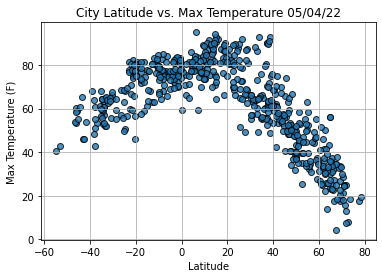

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

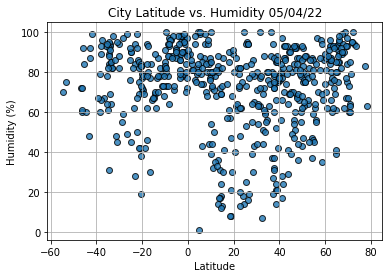

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

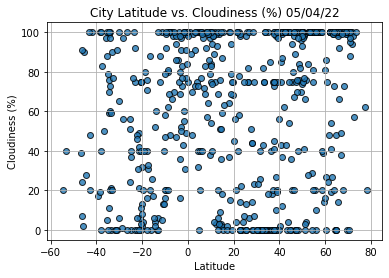

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

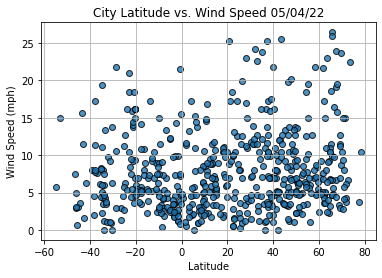

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                       Faanui
Country                        PF
Date          2022-05-04 22:35:22
Lat                      -16.4833
Lng                       -151.75
Max Temp                    81.28
Humidity                       77
Cloudiness                     88
Wind Speed                  10.76
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
558    False
559    False
560    False
561     True
562    False
Name: Lat, Length: 563, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guspini,IT,2022-05-04 22:39:49,39.5406,8.6294,62.98,75,100,7.09
2,Anzhero-Sudzhensk,RU,2022-05-04 22:39:50,56.0810,86.0285,34.43,56,0,6.06
3,Asau,RO,2022-05-04 22:39:50,46.4333,26.4000,50.95,84,98,3.24
4,Georgetown,MY,2022-05-04 22:38:06,5.4112,100.3354,82.33,99,20,5.75
7,Saint George,US,2022-05-04 22:38:14,37.1041,-113.5841,80.64,19,0,16.11
...,...,...,...,...,...,...,...,...,...
554,Puerto Carreno,CO,2022-05-04 22:54:09,6.1890,-67.4859,94.98,43,40,4.61
555,Mopti,ML,2022-05-04 22:54:10,14.6667,-4.0000,94.08,12,51,6.15
556,Tripoli,LY,2022-05-04 22:55:10,32.8752,13.1875,73.08,44,82,22.55
557,Kidal,ML,2022-05-04 22:55:10,18.4411,1.4078,89.17,8,100,10.42


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guspini,IT,2022-05-04 22:39:49,39.5406,8.6294,62.98,75,100,7.09
2,Anzhero-Sudzhensk,RU,2022-05-04 22:39:50,56.0810,86.0285,34.43,56,0,6.06
3,Asau,RO,2022-05-04 22:39:50,46.4333,26.4000,50.95,84,98,3.24
4,Georgetown,MY,2022-05-04 22:38:06,5.4112,100.3354,82.33,99,20,5.75
7,Saint George,US,2022-05-04 22:38:14,37.1041,-113.5841,80.64,19,0,16.11


In [28]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

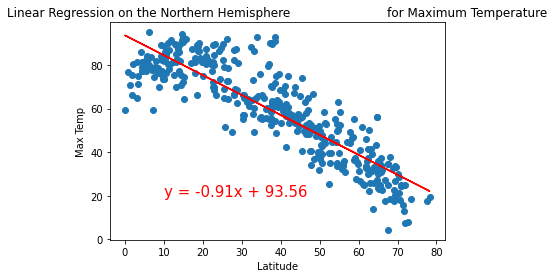

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

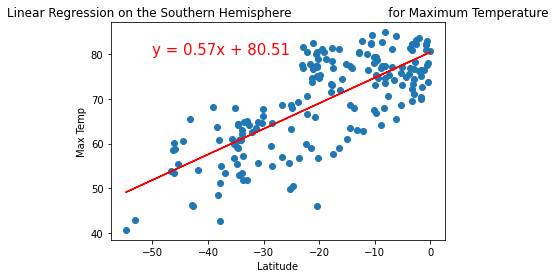

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

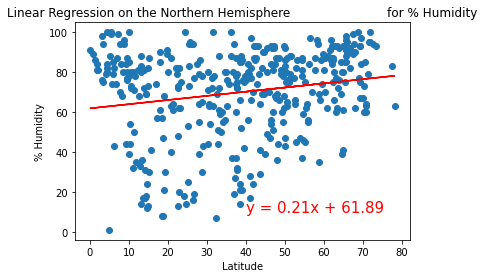

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

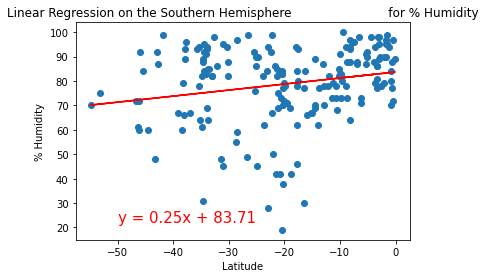

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,22))

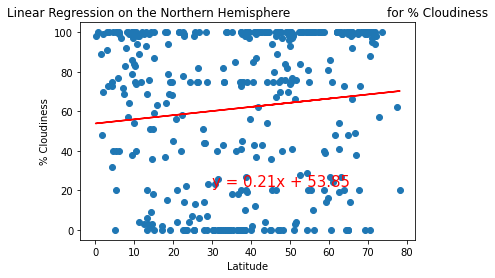

In [41]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,22))

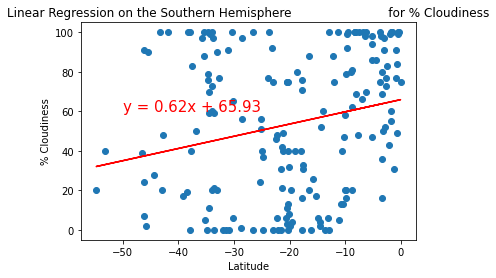

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

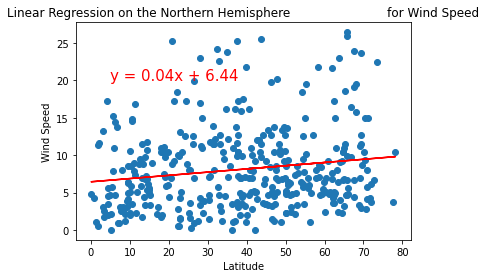

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,20))

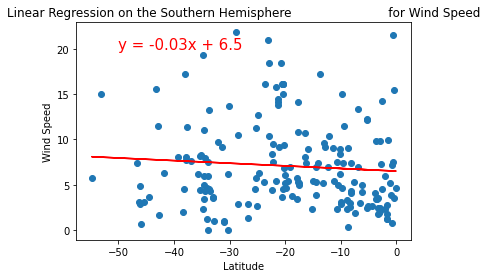

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))